In [196]:
%load_ext jupyternotify
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import seaborn as sns
import timeit
import import_ipynb
from sklearn.model_selection import KFold
from tqdm.auto import tqdm


import functions as func

pd.set_option('display.max_columns', None)

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [44]:
final_cluster = pd.read_csv('../data/final_cluster.csv', index_col=[0])
raw_data = pd.read_csv('../data/data_neutral.csv', index_col=[0])

In [52]:
data = raw_data.copy()

In [304]:
data.release_spin_rate_fastball.mean()

2243.7797704660493

In [305]:
data.release_spin_rate_breaking.mean()

2424.3608976082182

In [56]:
full = ['release_pos_x', 'release_pos_z', 'fastball_2pct', 'breaking_2pct', 'off_speed_2pct',
        'launch_speed', 'solid_rate', 'GB_rate', 'LD_rate', 'FB_rate', 'PU_rate', 'whiff_rate', 
        'OSwing_pct', 'K_9', 'hit_9', 'BB_9', 'HR_9', 'release_speed_breaking', 'release_speed_fastball',
        'release_speed_off_speed', 'pfx_x_breaking', 'pfx_x_fastball', 'pfx_x_off_speed', 
        'pfx_z_breaking', 'pfx_z_fastball', 'pfx_z_off_speed', 'release_spin_rate_breaking',
        'release_spin_rate_fastball', 'release_spin_rate_off_speed', 'spin_axis_fastball', 'spin_axis_off_speed']

player = ['release_pos_x', 'release_pos_z', 'fastball_2pct', 'breaking_2pct', 'off_speed_2pct']

swing = ['whiff_rate', 'OSwing_pct']

contact = ['launch_speed', 'solid_rate', 'GB_rate', 'LD_rate', 'FB_rate', 'PU_rate']

production = ['K_9', 'hit_9', 'BB_9', 'HR_9']

pitch = ['release_speed_breaking', 'release_speed_fastball', 'release_speed_off_speed', 
         'pfx_x_breaking', 'pfx_x_fastball', 'pfx_x_off_speed', 'pfx_z_breaking', 'pfx_z_fastball',
         'pfx_z_off_speed', 'release_spin_rate_breaking', 'release_spin_rate_fastball', 
         'release_spin_rate_off_speed', 'spin_axis_fastball', 'spin_axis_off_speed']
pitcher = ['pitcher', 'player_name', 'throws_right']

In [62]:
data_lean = data[pitcher+production+player+contact+pitch].copy()

In [63]:
data_lean = data_lean.merge(final_cluster, on='pitcher', how='outer').copy()

### add colors

In [261]:
colors = ['#DF2020', '#81DF20', '#2095DF']
colors = ['#b30000', '#1a53ff', '#5ad45a']
colors = ['#ea5545', '#edbf33', '#27aeef']
data_lean['c'] = data_lean.final_label.map({0:colors[0], 1:colors[1], 2:colors[2]})

# Pie Chart

In [276]:
data_lean.final_label.value_counts()

0    449
2    190
1     89
Name: final_label, dtype: int64

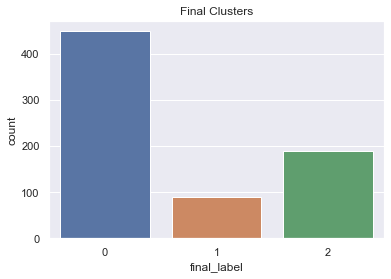

In [275]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots()
sns.countplot(x="final_label", data=data_lean, ax=ax).set(title='Final Clusters')

plt.show()

In [76]:
data_lean_group = data_lean.groupby(['final_label']).mean().copy()
data_lean_group

,pitcher,throws_right,K_9,hit_9,BB_9,HR_9,release_pos_x,release_pos_z,fastball_2pct,breaking_2pct,off_speed_2pct,launch_speed,solid_rate,GB_rate,LD_rate,FB_rate,PU_rate,release_speed_breaking,release_speed_fastball,release_speed_off_speed,pfx_x_breaking,pfx_x_fastball,pfx_x_off_speed,pfx_z_breaking,pfx_z_fastball,pfx_z_off_speed,release_spin_rate_breaking,release_spin_rate_fastball,release_spin_rate_off_speed,spin_axis_fastball,spin_axis_off_speed
final_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,594475.182628,1.000000,8.817806,8.710534,4.040497,1.443257,-1.844700,5.909686,0.587906,0.294440,0.117654,88.649182,0.143455,0.437483,0.218513,0.241777,0.096766,82.751376,93.329408,86.196406,0.557362,-0.689161,-1.092426,-0.222085,1.169601,0.644784,2453.657297,2270.525937,1736.106080,209.380094,234.453193
1,604118.146067,0.898876,8.923349,8.476155,4.252862,1.190807,-2.190033,5.403475,0.557584,0.267786,0.174630,87.681754,0.121275,0.501302,0.214327,0.208235,0.072027,82.792902,93.019932,85.802229,0.492427,-0.792578,-0.831307,0.028202,0.726831,0.224904,2382.170998,2171.821472,1703.712766,232.796834,252.204898
2,592949.121053,0.021053,8.792160,8.928342,3.906198,1.390395,-2.063724,5.910482,0.585549,0.267097,0.147355,88.018208,0.139169,0.447271,0.222108,0.237641,0.088613,80.739502,91.674193,84.079125,-0.523782,0.703170,1.038851,-0.252150,1.129341,0.694953,2374.891517,2214.281137,1745.827155,211.705792,232.957117


In [75]:
data_lean[data_lean.final_label==2]['throws_right'].value_counts()

0    186
1      4
Name: throws_right, dtype: int64

# Handedness

In [279]:
data_lean['count'] = 1

In [280]:
data_lean.groupby(['final_label', 'throws_right']).agg({'count':sum})

count
final_label throws_right       
0           1               449
1           0                 9
            1                80
2           0               186
            1                 4

# K9

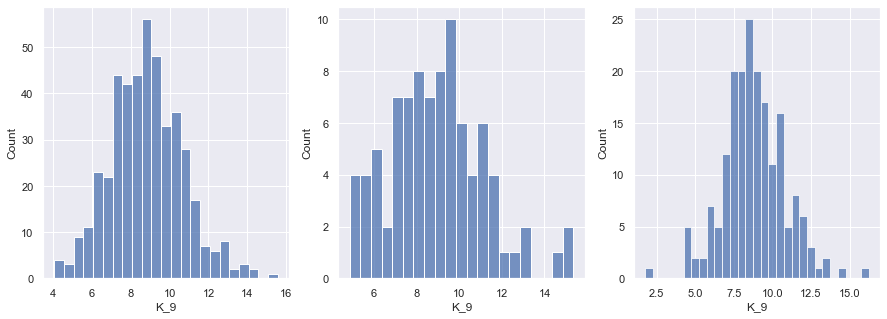

In [104]:
fig, ax = plt.subplots(1, 3, figsize=[15,5])
sns.histplot(data=data_lean[data_lean.final_label==0], x='K_9', binwidth=0.5, element="bars", ax=ax[0])
sns.histplot(data=data_lean[data_lean.final_label==1], x='K_9', binwidth=0.5, element="bars", ax=ax[1])
sns.histplot(data=data_lean[data_lean.final_label==2], x='K_9', binwidth=0.5, element="bars", ax=ax[2])
# plt.title('Distribution of VAA_new and VAA_lowered')
# plt.legend(['VAA_new', 'VAA_lowered'])
plt.show()

# HR9

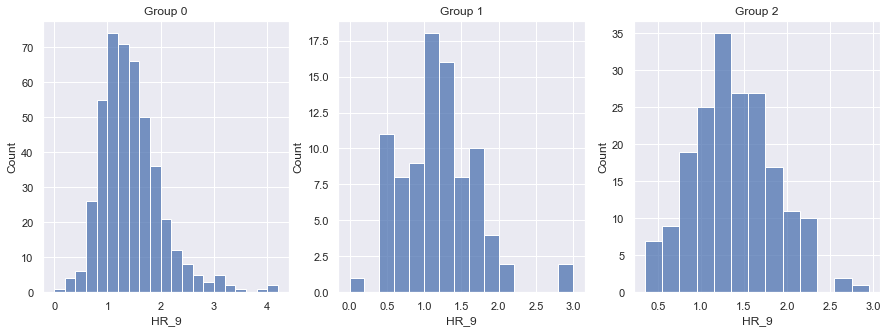

In [109]:
fig, ax = plt.subplots(1, 3, figsize=[15,5])
sns.histplot(data=data_lean[data_lean.final_label==0], x='HR_9', 
             binwidth=0.2, element="bars", ax=ax[0]).set_title('Group 0')
sns.histplot(data=data_lean[data_lean.final_label==1], x='HR_9', 
             binwidth=0.2, element="bars", ax=ax[1]).set_title('Group 1')
sns.histplot(data=data_lean[data_lean.final_label==2], x='HR_9', 
             binwidth=0.2, element="bars", ax=ax[2]).set_title('Group 2')
# plt.title('Distribution of VAA_new and VAA_lowered')
# plt.legend(['VAA_new', 'VAA_lowered'])
plt.show()

# Release Position

(0.0, 8.0)

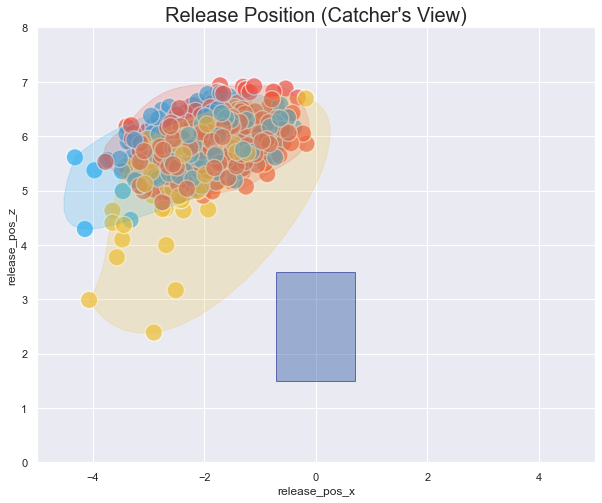

In [269]:
from scipy.spatial import ConvexHull
from scipy import interpolate


fig, ax = plt.subplots(1, figsize=(10,8))
# plot data
# plt.scatter(data_lean.release_pos_x, data_lean.release_pos_z, c=data_lean.c, alpha=0.7, s=300)

sns.scatterplot(data=data_lean, x="release_pos_x", y="release_pos_z", s=300, legend='full',
                alpha=0.7, c=data_lean.c, ax=ax)
# ax.legend(['Group 2', 'Group 0', 'Group 1'])

ax.add_patch(Rectangle((-0.708, 1.5), 1.416, 2, facecolor='b', alpha=0.5, edgecolor='navy'))
ax.set_title("Release Position (Catcher's View)", fontdict={'fontsize': 20})

for i in data_lean.final_label.unique():
    points = data_lean[data_lean.final_label == i][['release_pos_x', 'release_pos_z']].values
    
    hull = ConvexHull(points)
    
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
#     plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])

    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
    
plt.xlim(-5,5)
plt.ylim(0,8)

# Pitch Arsenal

/var/folders/x_/1k47n6n512j4cw0810rgvky40000gn/T/ipykernel_47482/1597079561.py:16: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax[1].pie(sizes_1, explode=explode_1, labels=labels, autopct='%1.1f%%',


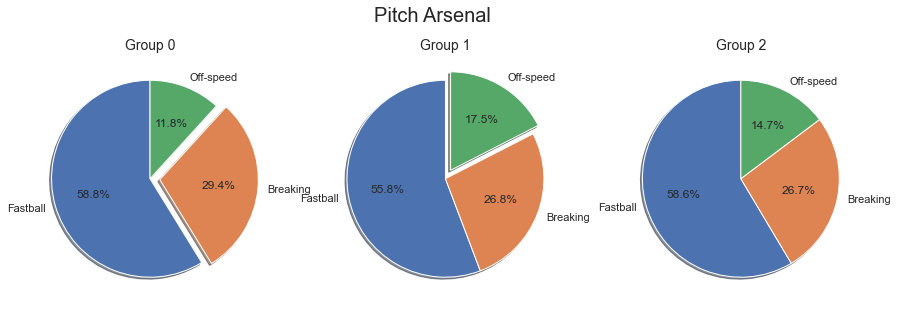

In [299]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Fastball', 'Breaking', 'Off-speed'
sizes_0 = [0.587906, 0.294440, 0.117654]
sizes_1 = [0.557584, 0.267786, 0.174630]
sizes_2 = [0.585549, 0.267097, 0.147355]

explode_0 = (0, 0.1, 0)
explode_1 = (0, 0, 0.1)
explode_2 = (0, 0, 0)

fig, ax = plt.subplots(1,3, figsize=[15,5])
ax[0].pie(sizes_0, explode=explode_0, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].set_title('Group 0', fontsize = 14)

ax[1].pie(sizes_1, explode=explode_1, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('Group 1', fontsize = 14)

ax[2].pie(sizes_2, explode=explode_2, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[2].set_title('Group 2', fontsize = 14)

fig.suptitle('Pitch Arsenal', fontsize=20)

plt.show()

# Contact

In [300]:
data_lean_group

,pitcher,throws_right,K_9,hit_9,BB_9,HR_9,release_pos_x,release_pos_z,fastball_2pct,breaking_2pct,off_speed_2pct,launch_speed,solid_rate,GB_rate,LD_rate,FB_rate,PU_rate,release_speed_breaking,release_speed_fastball,release_speed_off_speed,pfx_x_breaking,pfx_x_fastball,pfx_x_off_speed,pfx_z_breaking,pfx_z_fastball,pfx_z_off_speed,release_spin_rate_breaking,release_spin_rate_fastball,release_spin_rate_off_speed,spin_axis_fastball,spin_axis_off_speed
final_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,594475.182628,1.000000,8.817806,8.710534,4.040497,1.443257,-1.844700,5.909686,0.587906,0.294440,0.117654,88.649182,0.143455,0.437483,0.218513,0.241777,0.096766,82.751376,93.329408,86.196406,0.557362,-0.689161,-1.092426,-0.222085,1.169601,0.644784,2453.657297,2270.525937,1736.106080,209.380094,234.453193
1,604118.146067,0.898876,8.923349,8.476155,4.252862,1.190807,-2.190033,5.403475,0.557584,0.267786,0.174630,87.681754,0.121275,0.501302,0.214327,0.208235,0.072027,82.792902,93.019932,85.802229,0.492427,-0.792578,-0.831307,0.028202,0.726831,0.224904,2382.170998,2171.821472,1703.712766,232.796834,252.204898
2,592949.121053,0.021053,8.792160,8.928342,3.906198,1.390395,-2.063724,5.910482,0.585549,0.267097,0.147355,88.018208,0.139169,0.447271,0.222108,0.237641,0.088613,80.739502,91.674193,84.079125,-0.523782,0.703170,1.038851,-0.252150,1.129341,0.694953,2374.891517,2214.281137,1745.827155,211.705792,232.957117


/var/folders/x_/1k47n6n512j4cw0810rgvky40000gn/T/ipykernel_47482/3153900112.py:12: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax[0].pie(sizes_0, explode=explode_0, labels=labels, autopct='%1.1f%%',
/var/folders/x_/1k47n6n512j4cw0810rgvky40000gn/T/ipykernel_47482/3153900112.py:16: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax[1].pie(sizes_1, explode=explode_1, labels=labels, autopct='%1.1f%%',
/var/folders/x_/1k47n6n512j4cw0810rgvky40000gn/T/ipykernel_47482/3153900112.py:20: MatplotlibDeprecationWarning: normalize

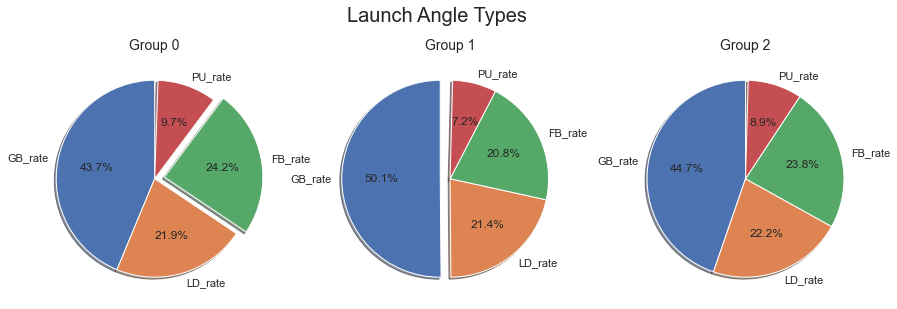

In [302]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'GB_rate', 'LD_rate', 'FB_rate', 'PU_rate'
sizes_0 = [0.437483, 0.218513, 0.241777, 0.096766]
sizes_1 = [0.501302, 0.214327, 0.208235, 0.072027]
sizes_2 = [0.447271, 0.222108, 0.237641, 0.088613]

explode_0 = (0, 0, 0.1, 0)
explode_1 = (0.1, 0, 0, 0)
explode_2 = (0, 0, 0, 0)

fig, ax = plt.subplots(1,3, figsize=[15,5])
ax[0].pie(sizes_0, explode=explode_0, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].set_title('Group 0', fontsize = 14)

ax[1].pie(sizes_1, explode=explode_1, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('Group 1', fontsize = 14)

ax[2].pie(sizes_2, explode=explode_2, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[2].set_title('Group 2', fontsize = 14)

fig.suptitle('Launch Angle Types', fontsize=20)

plt.show()

# Avg Speed

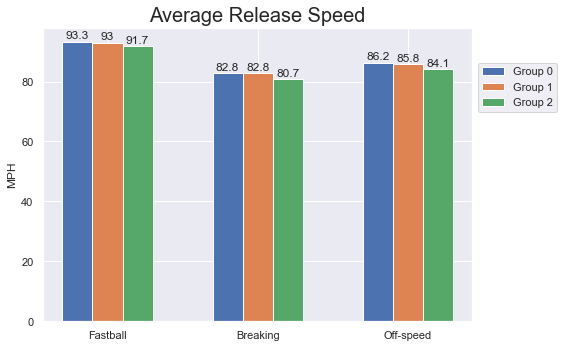

In [353]:
labels = ['Fastball', 'Breaking', 'Off-speed']
speed_0 = [93.3, 82.8, 86.2]
speed_1 = [93, 82.8, 85.8]
speed_2 = [91.7, 80.7, 84.1]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=[8,5])
rects0 = ax.bar(x - width, speed_0, width, label='Group 0')
rects1 = ax.bar(x, speed_1, width, label='Group 1')
rects2 = ax.bar(x + width, speed_2, width, label='Group 2')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MPH')
ax.set_title('Average Release Speed', fontsize = 20)# ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1, 0.9))
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Fastball','Breaking','Off-speed'])

ax.bar_label(rects0, padding=1)
ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)


fig.tight_layout()

plt.show()

# Spin Rate

In [339]:
data_lean_group

,pitcher,throws_right,K_9,hit_9,BB_9,HR_9,release_pos_x,release_pos_z,fastball_2pct,breaking_2pct,off_speed_2pct,launch_speed,solid_rate,GB_rate,LD_rate,FB_rate,PU_rate,release_speed_breaking,release_speed_fastball,release_speed_off_speed,pfx_x_breaking,pfx_x_fastball,pfx_x_off_speed,pfx_z_breaking,pfx_z_fastball,pfx_z_off_speed,release_spin_rate_breaking,release_spin_rate_fastball,release_spin_rate_off_speed,spin_axis_fastball,spin_axis_off_speed
final_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,594475.182628,1.000000,8.817806,8.710534,4.040497,1.443257,-1.844700,5.909686,0.587906,0.294440,0.117654,88.649182,0.143455,0.437483,0.218513,0.241777,0.096766,82.751376,93.329408,86.196406,0.557362,-0.689161,-1.092426,-0.222085,1.169601,0.644784,2453.657297,2270.525937,1736.106080,209.380094,234.453193
1,604118.146067,0.898876,8.923349,8.476155,4.252862,1.190807,-2.190033,5.403475,0.557584,0.267786,0.174630,87.681754,0.121275,0.501302,0.214327,0.208235,0.072027,82.792902,93.019932,85.802229,0.492427,-0.792578,-0.831307,0.028202,0.726831,0.224904,2382.170998,2171.821472,1703.712766,232.796834,252.204898
2,592949.121053,0.021053,8.792160,8.928342,3.906198,1.390395,-2.063724,5.910482,0.585549,0.267097,0.147355,88.018208,0.139169,0.447271,0.222108,0.237641,0.088613,80.739502,91.674193,84.079125,-0.523782,0.703170,1.038851,-0.252150,1.129341,0.694953,2374.891517,2214.281137,1745.827155,211.705792,232.957117


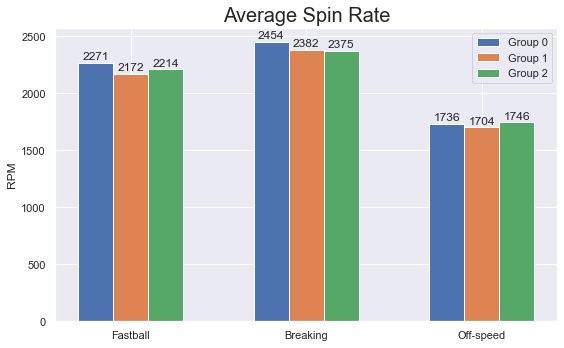

In [378]:
labels = ['Fastball', 'Breaking', 'Off-speed']
speed_0 = [2271, 2454, 1736]
speed_1 = [2172, 2382, 1704]
speed_2 = [2214, 2375, 1746]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=[8,5])
rects0 = ax.bar(x - width, speed_0, width, label='Group 0')
rects1 = ax.bar(x, speed_1, width, label='Group 1')
rects2 = ax.bar(x + width, speed_2, width, label='Group 2')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('RPM')
ax.set_title('Average Spin Rate', fontsize = 20)# ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Fastball','Breaking','Off-speed'])

ax.bar_label(rects0, padding=1)
ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)


fig.tight_layout()

plt.show()

# PCA Graph

In [361]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = data.copy()
for i in data.columns[3:]:
    data_std[i] = scaler.fit_transform(data[[i]])

In [362]:
from sklearn.decomposition import PCA

In [364]:
data_std = data_std.merge(final_cluster, on='pitcher', how='outer').copy()

In [365]:
X = data_std[production+player+contact+pitch]

pca = PCA(n_components=10).fit(X)
transformed = pca.transform(X)

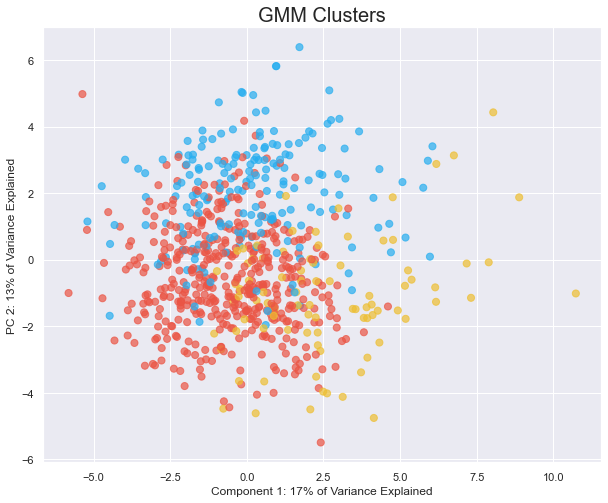

In [400]:
xs = transformed[:,0]
ys = transformed[:,1]

fig, ax = plt.subplots(figsize=[10,8])
ax.set_title('GMM Clusters', fontsize = 20)# ax.set_xticks(x, labels)
ok = plt.scatter(x=xs, y=ys, s=50, alpha=0.7, c=data_lean.c)
ax.set_xlabel('Component 1: 17% of Variance Explained')
ax.set_ylabel('PC 2: 13% of Variance Explained')

plt.show()

In [397]:
pca.explained_variance_ratio_

array([0.16958879, 0.13395088, 0.09215849, 0.07667362, 0.07028135,
       0.06306913, 0.05487623, 0.04697363, 0.03848408, 0.03516262])

In [402]:
# features = range(pca.explained_variance_)

# plt.bar(features, pca.explained_variance_)
# plt.ylabel('variance')
# plt.xlabel('PCA feature')
# plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index